# Advanced Topics in Data Science (CS5661). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun/ Vrezh Khalatyan
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [1]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

Using TensorFlow backend.


## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [27]:
np.random.seed(0)

# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [28]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


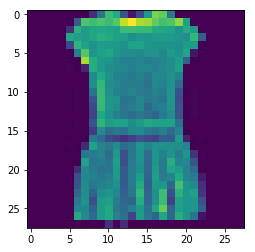

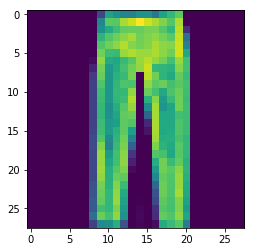

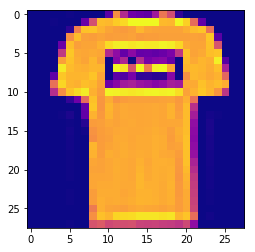

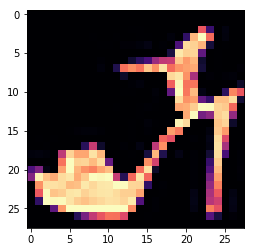

In [29]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [31]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [32]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [34]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [35]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [36]:
# Declare Sequential model fro our network:
model = Sequential()

In [37]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape) # -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 26, 26, 32)


In [38]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 24, 24, 32)
(None, 12, 12, 32)


In [39]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4608)
(None, 128)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

## Training:

In [46]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire x and y data provided. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/25
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1474 - acc: 0.9445
Epoch 2/25
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1391 - acc: 0.9464
Epoch 3/25
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1348 - acc: 0.9495
Epoch 4/25
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1319 - acc: 0.9500
Epoch 5/25
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1298 - acc: 0.9509
Epoch 6/25
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1274 - acc: 0.9507
Epoch 7/25
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1238 - acc: 0.9527
Epoch 8/25
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1231 - acc: 0.9527
Epoch 9/25
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1190 - acc: 0.9553
Epoch 10/25
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1201 - a

In [47]:
# Training with Validation:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=2)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

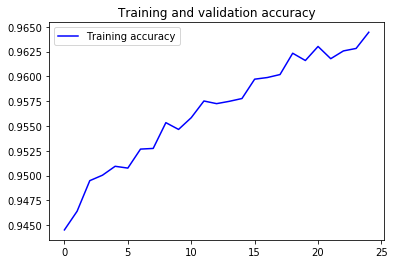

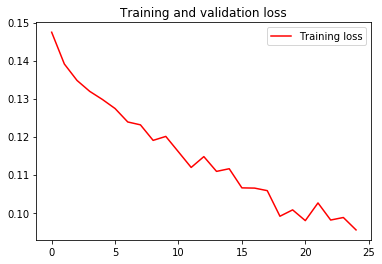

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [49]:
predicted_classes = model.predict_classes(X_test)

In [50]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 4s 443us/step
The accuracy is:  0.9313
